# Plotting Sigmoid Function 

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits.mplot3d
import matplotlib.colors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

# $S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [192]:
def sigmoid(x,w,b):
    return 1/(1 + np.exp(-(w*x + b)))

In [193]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [194]:
w = 0.9
b = 0.1
X = np.linspace(-10,10,100)#linspace givese linearly spaced numbers between first two parameters and gives the equivalent of the third parameter in count
Y = sigmoid(X, w, b)

In [195]:
type(Y) # now Y is an array

numpy.ndarray

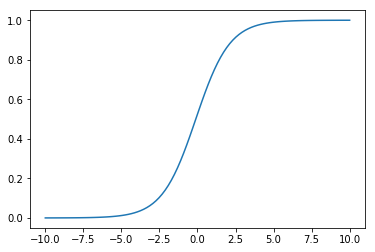

In [196]:
plt.plot(X,Y)
plt.show()#you can change the vakue of w and b and see the change in the graph below # slider available in google colab as a code snipet 
#just type #@param {type: "slider", min: -2, max: 2, step: 0.1}

In [197]:
#b changes the shift, w changes the rate of drop ie, slope

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^(-(w_1x_1+w_2x_2 + b))}$

In [198]:
def sigmoid_2d(x1, x2, w1, w2,b):
    return 1/(1 + np.exp(-(w1*x1+ w2*x2 + b)))    

In [199]:
sigmoid_2d(2,1,2,1,0.5)

0.995929862284104

In [200]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [201]:
import mpl_toolkits.mplot3d

In [202]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1,X2)# grid used when every combination needs to be considered else it would have a combination linearly only

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [203]:
w1 = 5 # if w is negative the slope would be other way, if w 1 is less so the transition along the x axis is wider, if a line is passed parallel to the x axis
w2 = -1 # if w2 is more so the transition along the y axis is narrower, if a line is passed parrallel to y axis
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

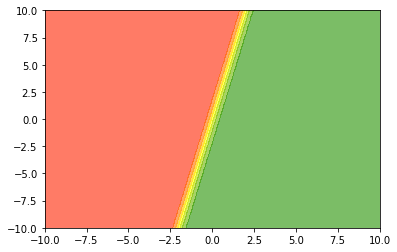

In [204]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.contourf(XX1,XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

In [205]:
#blue is zero, yellow is one

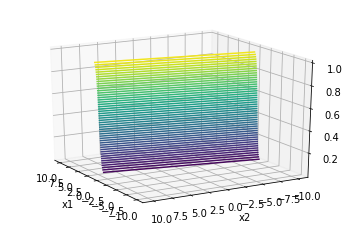

In [206]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 50, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(20,150)

# Compute loss for a given dataset

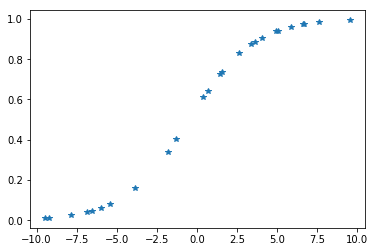

In [207]:
#random.random generates numbers between -1 and +1
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

plt.plot(X,Y, '*')
plt.show()

In [208]:
#w can be any real number
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [209]:
W = np.linspace(0,2,100)
B = np.linspace(0,2,100)

WW,BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [210]:
WW.shape

(100, 100)

In [211]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j] = calculate_loss(X,Y,WW[i,j], BB[i,j])

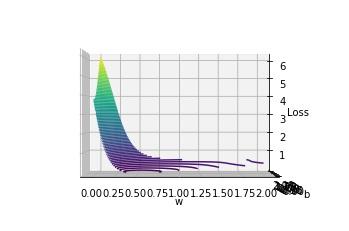

In [212]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(WW, BB, Loss,80, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(0, 270)

In [213]:
# we need to find out the w,b for which the loss is minimum

In [214]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i*Loss.shape[1])

In [215]:
print(i,j)

12 25


In [216]:
print(WW[i,j], BB[i,j])

0.5050505050505051 0.24242424242424243


In [217]:
# the above graph is between, w,b and loss(z axis), before this it was x1,x2 and Y)output on z axis)

# Class for sigmoid neuron

In [308]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b #T is transpose
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)*x
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):
        #initialise w,b
        if initialise:
            self.w = np.random.randn(1, X.shape[1]) # number of columns in X(input) would be the no of columns in self.w
            self.b = 0
            
        if display_loss:
            loss = {}        

        for i in tqdm_notebook(range(epochs), total = epochs, unit= "epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
                
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
        
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred, Y)
            
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
            
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)
    

# Fit for toy data

In [219]:
X = np.asarray([[2.5,2.5], [4,-1], [1,-4], [-3,1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [220]:
import numpy as np

In [221]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [222]:
def plot_sn(X, Y, sn):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    plt.contourf(XX1, XX2, YY, cmap = my_cmap, alpha = 0.6)
    plt.scatter(X[:,0], X[:,1], c = Y)
    plt.plot()

[[1.68450511 0.0576367 ]] [0.03867992]
[[ 1.65335733 -0.22523569]] [0.00620665]
[[ 1.5896008  -0.58838914]] [-0.06766839]
[[ 1.64187037 -0.53834578]] [-0.10967581]
[[ 1.66464044 -0.56478261]] [-0.14858085]
[[ 1.69280053 -0.56901224]] [-0.1840386]
[[ 1.71757495 -0.57769894]] [-0.21700356]
[[ 1.74115528 -0.58506902]] [-0.24767292]
[[ 1.76337803 -0.59212036]] [-0.2763217]
[[ 1.7844176  -0.59878852]] [-0.30316629]
[[ 1.80438969 -0.60511766]] [-0.3283943]
[[ 1.82339635 -0.61113973]] [-0.35216738]
[[ 1.84152617 -0.61688269]] [-0.37462566]
[[ 1.85885645 -0.62237103]] [-0.39589117]
[[ 1.87545497 -0.62762625]] [-0.41607071]
[[ 1.89138147 -0.63266733]] [-0.43525819]
[[ 1.90668879 -0.63751111]] [-0.45353648]
[[ 1.92142391 -0.64217256]] [-0.47097905]
[[ 1.93562873 -0.64666505]] [-0.48765127]
[[ 1.94934077 -0.65100056]] [-0.50361154]


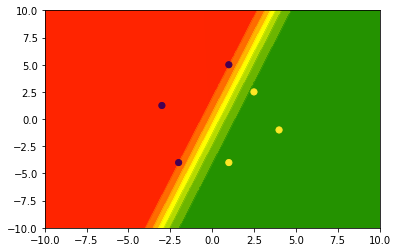

In [223]:
sn.fit(X, Y, 1, 0.5, True)
for i in range(20):
    print(sn.w, sn.b)
    plot_sn(X, Y, sn)
    sn.fit(X, Y, 1, 0.5, False)

In [224]:
#trying to separate the plots using subplots, so as to display the change in the learning of algo, without overwriting them
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap = my_cmap, alpha = 0.6)
    ax.scatter(X[:,0], X[:,1], c = Y, cmap = my_cmap)
    ax.plot()

[[-2.26420146 -0.97957329]] [0.01510107]
[[-2.24682795 -1.02354862]] [0.02402]
[[-2.23172016 -1.05640001]] [0.0299111]
[[-2.21775338 -1.08276636]] [0.03396378]
[[-2.20437695 -1.10490428]] [0.03675619]
[[-2.19127346 -1.12408596]] [0.03861208]
[[-2.17823679 -1.14110211]] [0.03972959]
[[-2.16511938 -1.15648026]] [0.04023724]
[[-2.15180617 -1.17059223]] [0.0402215]
[[-2.13820025 -1.18371231]] [0.03974168]
[[-2.12421424 -1.19605102]] [0.03883837]
[[-2.10976453 -1.20777598]] [0.03753857]
[[-2.09476702 -1.21902546]] [0.03585886]
[[-2.07913364 -1.22991767]] [0.03380727]
[[-2.062769   -1.24055745]] [0.03138438]
[[-2.04556706 -1.25104142]] [0.02858388]
[[-2.02740717 -1.26146223]] [0.02539258]
[[-2.00814946 -1.27191242]] [0.02179004]
[[-1.98762893 -1.28248818]] [0.0177477]
[[-1.96564769 -1.29329352]] [0.01322748]


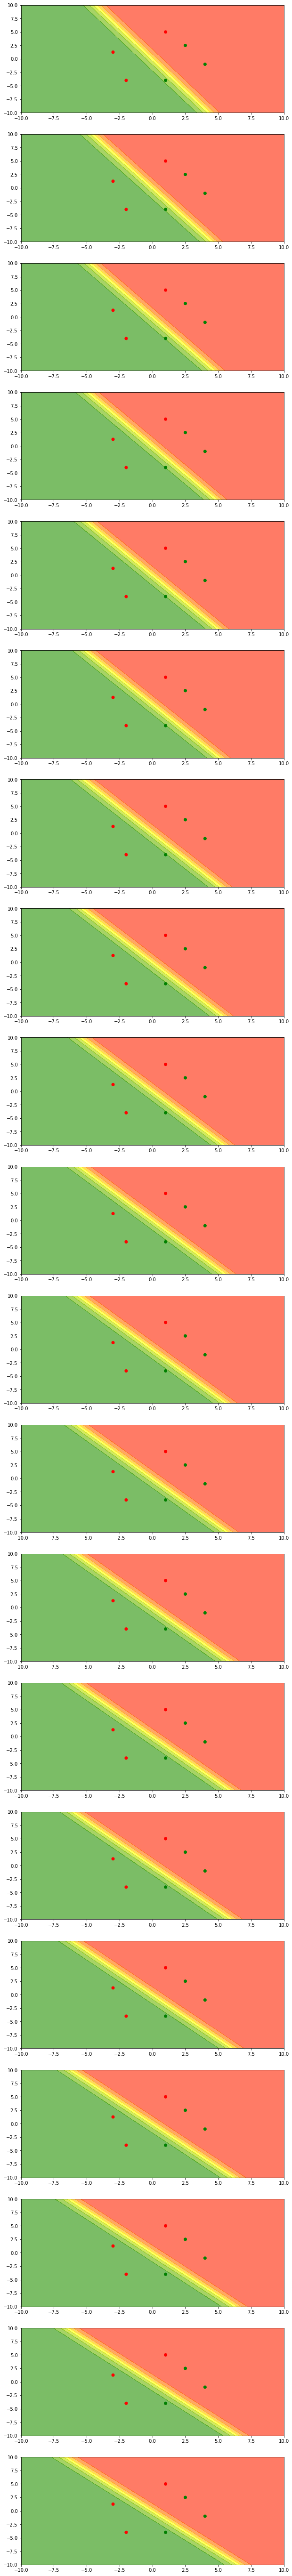

In [225]:

sn.fit(X, Y, 1, 0.5, True)
N = 20
plt.figure(figsize = (10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i + 1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.5, False)

In [226]:
#wget https://(dropbox link etc)/mobile_cleaned.csv
#!ls
data = pd.read_csv('mobile_cleaned.csv')

In [227]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [228]:
data.shape

(341, 88)

In [229]:
X = data.drop('Rating', axis = 1)

In [230]:
Y = data['Rating'].values

In [231]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [232]:
# theres a real values y and a bimarised value of y
# in training real value of y is used because sigmoid neuron can capture real valued output
#but accuracy is calculated on the binarised value

In [233]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)#to convert true false to 0,1

In [234]:
data['Class'].value_counts()#skewd data so changing  the threshold

0    182
1    159
Name: Class, dtype: int64

In [235]:
data['Class'].value_counts(normalize = True)#in percentages

0    0.533724
1    0.466276
Name: Class, dtype: float64

# Standardisation

In [236]:
# z = (x - u)/s
#Z will have a mean of 0 and DS will be 1

In [237]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [238]:
R = np.random.random([100, 1])

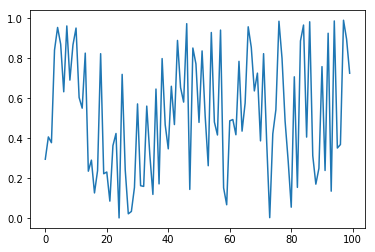

In [239]:
R # 100 numbers between 0,1
plt.plot(R)
plt.show()

In [240]:
np.mean(R)

0.5220443985719259

In [241]:
np.std(R)

0.2964282694171829

In [242]:
scaler = StandardScaler()

In [243]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [244]:
scaler.mean_

array([0.5220444])

In [245]:
RT = scaler.transform(R)

In [246]:
np.mean(RT)

1.4765966227514583e-16

In [247]:
np.std(RT)#now std is 1 as expected

0.9999999999999999

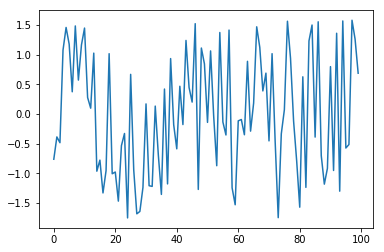

In [248]:
plt.plot(RT)
plt.show()

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)#, stratify = Y_binarised use it as well, Y_binarised in the other pynb file
# by stratify the no of 1, 0 in train and test is rougly the same

In [251]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [252]:
# all the preprocessing done in X_train, and later standardise on test by using the same std,
#mean parametersby fit(on train) and transform(on test) or even by fit.transform function

In [253]:
# first split then all the preprocessing is done and not the otherwise round

In [254]:
scaler = StandardScaler()

In [255]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)# only transform and no fit on the test data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [256]:
#we need standardisation of y as well, should not do with Y same what we did with X, 
#Y transformed in 0-1 rangen as per the sigmoid neuron so using min max methhod
minmax_scaler = MinMaxScaler()

In [257]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [258]:
Y_scaled_test = minmax_scaler.fit_transform(Y_test.reshape(-1,1))

In [259]:
np.min(Y_scaled_train)

0.0

In [260]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1,-1)))[0][0]

In [261]:
scaled_threshold

0.5555555555555556

In [262]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

In [263]:
Y_binarised_train

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [264]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

# Train on real data

In [309]:
sn = SigmoidNeuron()

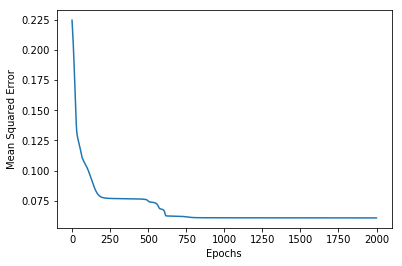

In [310]:
sn.fit(X_scaled_train, Y_scaled_train, epochs = 2000, learning_rate = 0.015, display_loss = True)

#this is a loss plot

In [295]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [296]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [297]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [298]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [299]:
print(accuracy_test, accuracy_train)

0.6162790697674418 0.8470588235294118
